In [1]:
import scipy.io
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import random

In [2]:
data = scipy.io.loadmat('MNISTmini.mat')
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'train_fea1', 'train_gnd1', 'test_fea1', 'test_gnd1'])


In [68]:
training_set = data['train_fea1']
training_label = data['train_gnd1']

print(training_set.shape)
print(training_set[0])

(60000, 100)
(10000, 100)
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0  64   0   0   0   0   0   0
   0 234 255 253   0   0   0   0   0  80 251 251 253   0   0   0   0   0
 205 251 251  12   0   0   0   0  68 253 251  23   0   0   0   0   0 244
 251 189   0   0   0   0   0   0   0 253  31   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


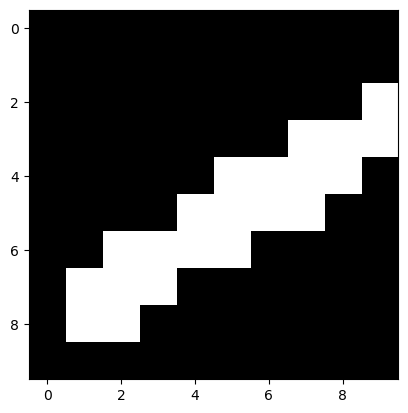

In [70]:
plt.imshow(training_set[0].reshape(10,10), cmap='gray')
plt.show()

In [69]:
value = 1
training_set[training_set != 0] = value
# testing_set[110]

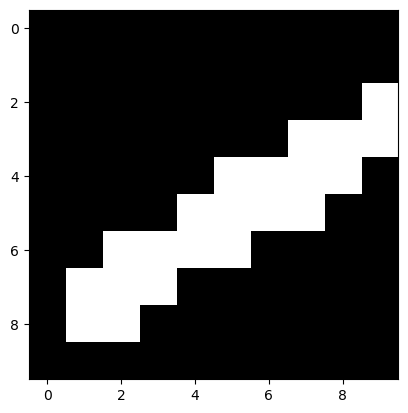

In [71]:
plt.imshow(training_set[0].reshape(10,10), cmap='gray')
plt.show()

In [51]:
new_training_set = np.append(training_set, training_label, axis=1)
print(new_training_set[1])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1.]


In [52]:
index5 = np.where(training_label == 5)[0][0]
index8 = np.where(training_label == 8)[0][0]

training = np.concatenate((new_training_set[index5:(index5+500)], new_training_set[index8:(index8+500)]))
training = sorted(training, key=lambda k: random.random())
training = np.array(training).reshape(1000, 101)

validation = np.concatenate((new_training_set[(index5+500):(index5+1000)], new_training_set[(index8+500):(index8+1000)]))
validation = sorted(validation, key=lambda k: random.random())
validation = np.array(validation).reshape(1000, 101)

testing = np.concatenate((new_training_set[(index5+1000):(index5+1500)], new_training_set[(index8+1000):(index8+1500)]))
testing = sorted(testing, key=lambda k: random.random())
testing = np.array(testing).reshape(1000, 101)

In [53]:
# print(type(training))

# for i in range(len(training)):
#     plt.imshow(training[i][0:100].reshape(10,10), cmap='gray')
#     plt.show()

In [54]:
X = training[:,0:100]
# print(X.shape)

y = training[:,100]
# print(y.shape)

# Base Model

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [56]:
baseModel = LogisticRegression().fit(X,y)
baseModel.score(validation[:,0:100], validation[:,100])

0.941

In [57]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=5, random_state=0, shuffle=True)
model = LogisticRegression()
results = cross_val_score(model, X, y, cv=kfold)
results

array([0.955, 0.955, 0.965, 0.95 , 0.95 ])

In [58]:
import pickle as pk
n = 20
compiled_models = []


Cs = [1.0, 0.01, 0.001, 0.0001, 0.00001]
tolerances = [0.001, 0.0001]
duals = [True, False]
penalties = ['l2', 'l1', 'elasticnet']
solvers = ['lbfgs', 'liblinear', 'sag', 'saga']
max_iters = [1000]
class_weights = ['balanced', 'None']
fit_intercepts = [True, False]
warm_starts = [True, False]

counter = 0

for C in Cs:
    for tol in tolerances:
        for dual in duals:
            for penalty in penalties:
                for solver in solvers:
                    for max_iter in max_iters:
                        for class_weight in class_weights:
                            for fit_intercept in fit_intercepts:
                                for warm_start in warm_starts:
                        
                                    print(f"Compiled Model: {counter}\n")

                                    try:
                                        model = LogisticRegression(penalty=penalty, 
                                                                   dual=dual, 
                                                                   tol=tol, 
                                                                   C=C, 
                                                                   solver=solver, 
                                                                   max_iter=max_iter, 
                                                                   class_weight = class_weight,
                                                                   fit_intercept = fit_intercept, 
                                                                   warm_start = warm_start).fit(X, y)
                                    except:
                                        counter += 1
                                        continue

                                    compiled_models.append([float(model.score(validation[:, 0:100], validation[:,100])), model])
                                    counter += 1
                        
compiled_models.sort(key=lambda row: (row[0]))
compiled_models = compiled_models[::-1]
compiled_models = compiled_models[0:n]

for i, model in enumerate(compiled_models):
    print(model[0], model[1])
    filename = f'NPIKLE/Logisitic_Reg_{i}'
    pk.dump(model[1], open(filename, 'wb'))

Compiled Model: 0

Compiled Model: 1

Compiled Model: 2

Compiled Model: 3

Compiled Model: 4

Compiled Model: 5

Compiled Model: 6

Compiled Model: 7

Compiled Model: 8

Compiled Model: 9

Compiled Model: 10

Compiled Model: 11

Compiled Model: 12

Compiled Model: 13

Compiled Model: 14

Compiled Model: 15

Compiled Model: 16

Compiled Model: 17

Compiled Model: 18

Compiled Model: 19

Compiled Model: 20

Compiled Model: 21

Compiled Model: 22

Compiled Model: 23

Compiled Model: 24

Compiled Model: 25

Compiled Model: 26

Compiled Model: 27

Compiled Model: 28

Compiled Model: 29

Compiled Model: 30

Compiled Model: 31

Compiled Model: 32

Compiled Model: 33

Compiled Model: 34

Compiled Model: 35

Compiled Model: 36

Compiled Model: 37

Compiled Model: 38

Compiled Model: 39

Compiled Model: 40

Compiled Model: 41

Compiled Model: 42

Compiled Model: 43

Compiled Model: 44

Compiled Model: 45

Compiled Model: 46

Compiled Model: 47

Compiled Model: 48

Compiled Model: 49

Compiled M

Compiled Model: 523

Compiled Model: 524

Compiled Model: 525

Compiled Model: 526

Compiled Model: 527

Compiled Model: 528

Compiled Model: 529

Compiled Model: 530

Compiled Model: 531

Compiled Model: 532

Compiled Model: 533

Compiled Model: 534

Compiled Model: 535

Compiled Model: 536

Compiled Model: 537

Compiled Model: 538

Compiled Model: 539

Compiled Model: 540

Compiled Model: 541

Compiled Model: 542

Compiled Model: 543

Compiled Model: 544

Compiled Model: 545

Compiled Model: 546

Compiled Model: 547

Compiled Model: 548

Compiled Model: 549

Compiled Model: 550

Compiled Model: 551

Compiled Model: 552

Compiled Model: 553

Compiled Model: 554

Compiled Model: 555

Compiled Model: 556

Compiled Model: 557

Compiled Model: 558

Compiled Model: 559

Compiled Model: 560

Compiled Model: 561

Compiled Model: 562

Compiled Model: 563

Compiled Model: 564

Compiled Model: 565

Compiled Model: 566

Compiled Model: 567

Compiled Model: 568

Compiled Model: 569

Compiled Mode

Compiled Model: 1081

Compiled Model: 1082

Compiled Model: 1083

Compiled Model: 1084

Compiled Model: 1085

Compiled Model: 1086

Compiled Model: 1087

Compiled Model: 1088

Compiled Model: 1089

Compiled Model: 1090

Compiled Model: 1091

Compiled Model: 1092

Compiled Model: 1093

Compiled Model: 1094

Compiled Model: 1095

Compiled Model: 1096

Compiled Model: 1097

Compiled Model: 1098

Compiled Model: 1099

Compiled Model: 1100

Compiled Model: 1101

Compiled Model: 1102

Compiled Model: 1103

Compiled Model: 1104

Compiled Model: 1105

Compiled Model: 1106

Compiled Model: 1107

Compiled Model: 1108

Compiled Model: 1109

Compiled Model: 1110

Compiled Model: 1111

Compiled Model: 1112

Compiled Model: 1113

Compiled Model: 1114

Compiled Model: 1115

Compiled Model: 1116

Compiled Model: 1117

Compiled Model: 1118

Compiled Model: 1119

Compiled Model: 1120

Compiled Model: 1121

Compiled Model: 1122

Compiled Model: 1123

Compiled Model: 1124

Compiled Model: 1125

Compiled M

Compiled Model: 1468

Compiled Model: 1469

Compiled Model: 1470

Compiled Model: 1471

Compiled Model: 1472

Compiled Model: 1473

Compiled Model: 1474

Compiled Model: 1475

Compiled Model: 1476

Compiled Model: 1477

Compiled Model: 1478

Compiled Model: 1479

Compiled Model: 1480

Compiled Model: 1481

Compiled Model: 1482

Compiled Model: 1483

Compiled Model: 1484

Compiled Model: 1485

Compiled Model: 1486

Compiled Model: 1487

Compiled Model: 1488

Compiled Model: 1489

Compiled Model: 1490

Compiled Model: 1491

Compiled Model: 1492

Compiled Model: 1493

Compiled Model: 1494

Compiled Model: 1495

Compiled Model: 1496

Compiled Model: 1497

Compiled Model: 1498

Compiled Model: 1499

Compiled Model: 1500

Compiled Model: 1501

Compiled Model: 1502

Compiled Model: 1503

Compiled Model: 1504

Compiled Model: 1505

Compiled Model: 1506

Compiled Model: 1507

Compiled Model: 1508

Compiled Model: 1509

Compiled Model: 1510

Compiled Model: 1511

Compiled Model: 1512

Compiled M

In [59]:
import pickle as pk
n = 10
compiled_models = []


Cs = [2.5, 2.25, 2.0, 1.75, 1.5, 1.0,  0.01, 0.001, 0.0001, 0.00001]
tolerances = [0.001, 0.0001, 0.00001, 0.000001]
penalties = ['l1']
solvers = ['liblinear', 'sag', 'saga']
max_iters = [100, 1000]

counter = 0

for C in Cs:
    for tol in tolerances:
        for penalty in penalties:
            for solver in solvers:
                for max_iter in max_iters:

                    print(f"Compiled Model: {counter}\n")

                    try:
                        model = LogisticRegression(random_state=1, penalty=penalty, tol=tol, C=C, solver=solver, max_iter=max_iter).fit(X, y)
                    except:
                        counter += 1
                        continue

                    compiled_models.append([float(model.score(validation[:, 0:100], validation[:,100])), model])
                    counter += 1
                        
compiled_models.sort(key=lambda row: (row[0]))
compiled_models = compiled_models[::-1]
compiled_models = compiled_models[0:n]

for i, model in enumerate(compiled_models):
    print(model[0], model[1])
    filename = f'PIKLE_2/Logisitic_Reg_{i}'
    pk.dump(model[1], open(filename, 'wb'))

Compiled Model: 0

Compiled Model: 1

Compiled Model: 2

Compiled Model: 3

Compiled Model: 4



C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Compiled Model: 5

Compiled Model: 6

Compiled Model: 7

Compiled Model: 8

Compiled Model: 9

Compiled Model: 10



C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Compiled Model: 11

Compiled Model: 12

Compiled Model: 13

Compiled Model: 14

Compiled Model: 15

Compiled Model: 16



C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Compiled Model: 17



C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Compiled Model: 18

Compiled Model: 19

Compiled Model: 20

Compiled Model: 21

Compiled Model: 22



C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Compiled Model: 23



C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Compiled Model: 24

Compiled Model: 25

Compiled Model: 26

Compiled Model: 27

Compiled Model: 28

Compiled Model: 29

Compiled Model: 30

Compiled Model: 31

Compiled Model: 32

Compiled Model: 33

Compiled Model: 34

Compiled Model: 35



C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Compiled Model: 36

Compiled Model: 37

Compiled Model: 38

Compiled Model: 39

Compiled Model: 40



C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Compiled Model: 41



C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Compiled Model: 42

Compiled Model: 43

Compiled Model: 44

Compiled Model: 45

Compiled Model: 46



C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Compiled Model: 47



C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Compiled Model: 48

Compiled Model: 49

Compiled Model: 50

Compiled Model: 51

Compiled Model: 52

Compiled Model: 53

Compiled Model: 54

Compiled Model: 55

Compiled Model: 56

Compiled Model: 57

Compiled Model: 58

Compiled Model: 59



C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Compiled Model: 60

Compiled Model: 61

Compiled Model: 62

Compiled Model: 63

Compiled Model: 64



C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Compiled Model: 65

Compiled Model: 66

Compiled Model: 67

Compiled Model: 68

Compiled Model: 69

Compiled Model: 70



C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Compiled Model: 71



C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Compiled Model: 72

Compiled Model: 73

Compiled Model: 74

Compiled Model: 75

Compiled Model: 76

Compiled Model: 77

Compiled Model: 78

Compiled Model: 79

Compiled Model: 80

Compiled Model: 81

Compiled Model: 82



C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Compiled Model: 83

Compiled Model: 84

Compiled Model: 85

Compiled Model: 86

Compiled Model: 87

Compiled Model: 88



C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Compiled Model: 89

Compiled Model: 90

Compiled Model: 91

Compiled Model: 92

Compiled Model: 93

Compiled Model: 94



C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Compiled Model: 95



C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Compiled Model: 96

Compiled Model: 97

Compiled Model: 98

Compiled Model: 99

Compiled Model: 100

Compiled Model: 101

Compiled Model: 102

Compiled Model: 103

Compiled Model: 104

Compiled Model: 105

Compiled Model: 106

Compiled Model: 107



C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Compiled Model: 108

Compiled Model: 109

Compiled Model: 110

Compiled Model: 111

Compiled Model: 112

Compiled Model: 113



C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Compiled Model: 114

Compiled Model: 115

Compiled Model: 116

Compiled Model: 117

Compiled Model: 118



C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Compiled Model: 119



C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Compiled Model: 120

Compiled Model: 121

Compiled Model: 122

Compiled Model: 123

Compiled Model: 124

Compiled Model: 125

Compiled Model: 126

Compiled Model: 127

Compiled Model: 128

Compiled Model: 129

Compiled Model: 130

Compiled Model: 131



C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Compiled Model: 132

Compiled Model: 133

Compiled Model: 134

Compiled Model: 135

Compiled Model: 136



C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Compiled Model: 137

Compiled Model: 138

Compiled Model: 139

Compiled Model: 140

Compiled Model: 141

Compiled Model: 142



C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Compiled Model: 143

Compiled Model: 144

Compiled Model: 145

Compiled Model: 146

Compiled Model: 147

Compiled Model: 148

Compiled Model: 149

Compiled Model: 150

Compiled Model: 151

Compiled Model: 152

Compiled Model: 153

Compiled Model: 154

Compiled Model: 155

Compiled Model: 156

Compiled Model: 157

Compiled Model: 158

Compiled Model: 159

Compiled Model: 160

Compiled Model: 161

Compiled Model: 162

Compiled Model: 163

Compiled Model: 164

Compiled Model: 165

Compiled Model: 166

Compiled Model: 167

Compiled Model: 168

Compiled Model: 169

Compiled Model: 170

Compiled Model: 171

Compiled Model: 172

Compiled Model: 173

Compiled Model: 174

Compiled Model: 175

Compiled Model: 176

Compiled Model: 177

Compiled Model: 178

Compiled Model: 179

Compiled Model: 180

Compiled Model: 181

Compiled Model: 182

Compiled Model: 183

Compiled Model: 184

Compiled Model: 185

Compiled Model: 186

Compiled Model: 187

Compiled Model: 188

Compiled Model: 189

Compiled Mode

In [60]:
kfold = KFold(n_splits=5, random_state=0, shuffle=True)
model = LogisticRegression(C=1.5, penalty='l1', random_state=1, solver='saga', tol=1e-06)
results = cross_val_score(model, X, y, cv=kfold)
results

C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


array([0.95, 0.95, 0.96, 0.95, 0.97])

In [61]:
import pickle as pk
file = open('PIKLE_2\Logisitic_Reg_0', 'rb')
newModel = pk.load(file)
file.close()
newModel.score(X,y)

0.982

In [62]:
newModel.score(validation[:, 0:100], validation[:,100])

0.942

In [67]:
newModel.score(testing[:,0:100], testing[:,100])

0.933

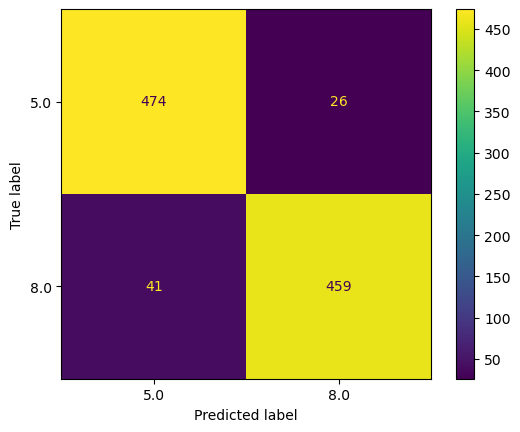

In [116]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
predictions = newModel.predict(testing[:, 0:100])
cm = confusion_matrix(testing[:,100], predictions, labels=newModel.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=newModel.classes_)
disp.plot()
fig = plt.gcf()
plt.show()
fig.savefig('BestModel_ConfusionMatrix.png')

C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

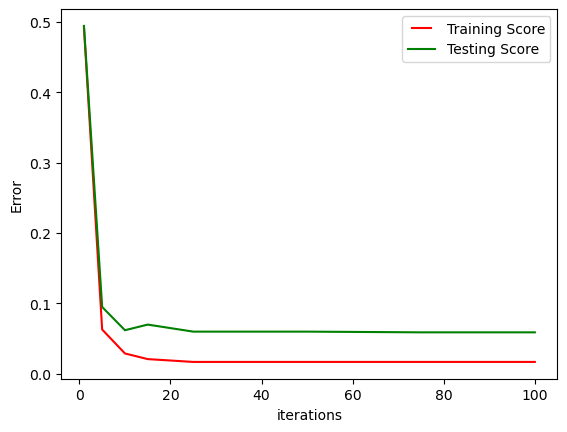

In [78]:
from sklearn.metrics import auc, accuracy_score
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

train_results = []
test_results = []
iterations = [1, 5, 10, 15, 25, 50, 75, 100]

for iteration in iterations:
    baseModel = LogisticRegression(max_iter=iteration).fit(X,y)
    baseModel.score(validation[:,0:100], validation[:,100])

    train_results.append(1 - (baseModel.score(X,y)))
    test_results.append(1 - (baseModel.score(validation[:,0:100], validation[:,100])))

line1, = plt.plot(iterations, train_results, color="r", label="Training Score")
line2, = plt.plot(iterations, test_results, color="g", label="Testing Score")

fig = plt.gcf()
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Error')
plt.xlabel('iterations')
plt.show()
fig.savefig('BaseModel_Iterations.png')

C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn

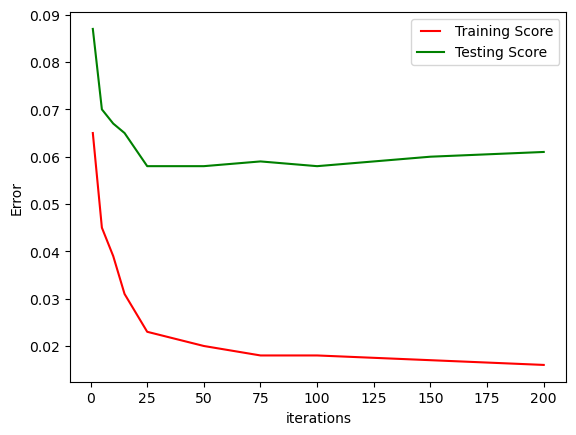

In [81]:
train_results = []
test_results = []
iterations = [1, 5, 10, 15, 25, 50, 75, 100, 150, 200]

for iteration in iterations:
    baseModel = LogisticRegression(max_iter=iteration, penalty='l1', random_state=1, solver='saga', tol=1e-06).fit(X,y)
    baseModel.score(validation[:,0:100], validation[:,100])

    train_results.append(1 - (baseModel.score(X,y)))
    test_results.append(1 - (baseModel.score(validation[:,0:100], validation[:,100])))

line1, = plt.plot(iterations, train_results, color="r", label="Training Score")
line2, = plt.plot(iterations, test_results, color="g", label="Testing Score")

fig = plt.gcf()
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Error')
plt.xlabel('iterations')
plt.show()
fig.savefig('BestModel_Iterations.png')

# MAKE SURE TO RUN MODEL ON TESTING SET

In [ ]:
# plt.imshow(training[4][0:100].reshape(10,10), cmap='gray')
# plt.show()
# plt.imshow(training[5][0:100].reshape(10,10), cmap='gray')
# plt.show()
# plt.imshow(training[6][0:100].reshape(10,10), cmap='gray')
# plt.show()

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [91]:
modelT = RandomForestClassifier()
modelT.fit(X,y)
modelT.score(X,y)

1.0

In [92]:
float(modelT.score(validation[:, 0:100], validation[:,100]))

0.985

In [99]:
modelT.score(testing[:,0:100], testing[:,100])

0.974

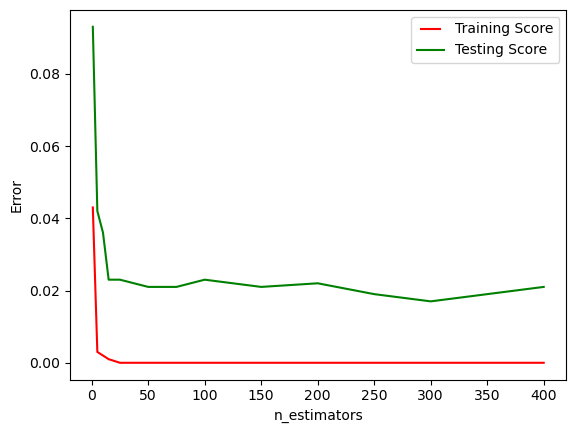

In [110]:
train_results = []
test_results = []
iterations = [1, 5, 10, 15, 25, 50, 75, 100, 150, 200, 250, 300, 400]

for iteration in iterations:
    baseModel = RandomForestClassifier(n_estimators=iteration).fit(X,y)
    baseModel.score(validation[:,0:100], validation[:,100])

    train_results.append(1 - (baseModel.score(X,y)))
    test_results.append(1 - (baseModel.score(validation[:,0:100], validation[:,100])))

line1, = plt.plot(iterations, train_results, color="r", label="Training Score")
line2, = plt.plot(iterations, test_results, color="g", label="Testing Score")

fig = plt.gcf()
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Error')
plt.xlabel('n_estimators')
plt.show()
fig.savefig('BaseModelTree_Iterations.png')

In [100]:
import pickle as pk
n = 20
compiled_models = []


criterions = ['gini', 'entropy', 'log_loss']
max_depths = [5, 10, 15, 20 ,25, 30]
min_samples_splits = [2, 3, 4, 5]
min_samples_leafs = [1, 2, 3]
max_featurez = ['sqrt', 'log2', 'None']
bootstraps = [True, False]
oob_scores = [True, False]
warm_starts = [True, False]

counter = 0

for criterion in criterions:
    for max_depth in max_depths:
        for min_samples_split in min_samples_splits :
            for min_samples_leaf in min_samples_leafs:
                for max_features in max_featurez:
                    for bootstrap in bootstraps:
                        for oob_score in oob_scores:
                            for warm_start in warm_starts:
                        
                                print(f"Compiled Model: {counter}\n")

                                try:
                                    model = RandomForestClassifier(criterion = criterion, max_depth = max_depth, 
                                                                   min_samples_split = min_samples_split, 
                                                                   min_samples_leaf = min_samples_leaf, 
                                                                   max_features = max_features, 
                                                                   bootstrap = bootstrap, 
                                                                   oob_score = oob_score, 
                                                                   warm_start = warm_start).fit(X, y)
                                except:
                                    counter += 1
                                    continue

                                compiled_models.append([float(model.score(validation[:, 0:100], validation[:,100])), model])
                                counter += 1

compiled_models.sort(key=lambda row: (row[0]))
compiled_models = compiled_models[::-1]
compiled_models = compiled_models[0:n]

for i, model in enumerate(compiled_models):
    print(model[0], model[1])
    filename = f'PIKLE_TREE/Random_Forest_{i}'
    pk.dump(model[1], open(filename, 'wb'))

Compiled Model: 0

Compiled Model: 1

Compiled Model: 2

Compiled Model: 3

Compiled Model: 4

Compiled Model: 5

Compiled Model: 6

Compiled Model: 7

Compiled Model: 8

Compiled Model: 9

Compiled Model: 10

Compiled Model: 11

Compiled Model: 12

Compiled Model: 13

Compiled Model: 14

Compiled Model: 15

Compiled Model: 16

Compiled Model: 17

Compiled Model: 18

Compiled Model: 19

Compiled Model: 20

Compiled Model: 21

Compiled Model: 22

Compiled Model: 23

Compiled Model: 24

Compiled Model: 25

Compiled Model: 26

Compiled Model: 27

Compiled Model: 28

Compiled Model: 29

Compiled Model: 30

Compiled Model: 31

Compiled Model: 32

Compiled Model: 33

Compiled Model: 34

Compiled Model: 35

Compiled Model: 36

Compiled Model: 37

Compiled Model: 38

Compiled Model: 39

Compiled Model: 40

Compiled Model: 41

Compiled Model: 42

Compiled Model: 43

Compiled Model: 44

Compiled Model: 45

Compiled Model: 46

Compiled Model: 47

Compiled Model: 48

Compiled Model: 49

Compiled M

Compiled Model: 399

Compiled Model: 400

Compiled Model: 401

Compiled Model: 402

Compiled Model: 403

Compiled Model: 404

Compiled Model: 405

Compiled Model: 406

Compiled Model: 407

Compiled Model: 408

Compiled Model: 409

Compiled Model: 410

Compiled Model: 411

Compiled Model: 412

Compiled Model: 413

Compiled Model: 414

Compiled Model: 415

Compiled Model: 416

Compiled Model: 417

Compiled Model: 418

Compiled Model: 419

Compiled Model: 420

Compiled Model: 421

Compiled Model: 422

Compiled Model: 423

Compiled Model: 424

Compiled Model: 425

Compiled Model: 426

Compiled Model: 427

Compiled Model: 428

Compiled Model: 429

Compiled Model: 430

Compiled Model: 431

Compiled Model: 432

Compiled Model: 433

Compiled Model: 434

Compiled Model: 435

Compiled Model: 436

Compiled Model: 437

Compiled Model: 438

Compiled Model: 439

Compiled Model: 440

Compiled Model: 441

Compiled Model: 442

Compiled Model: 443

Compiled Model: 444

Compiled Model: 445

Compiled Mode

Compiled Model: 794

Compiled Model: 795

Compiled Model: 796

Compiled Model: 797

Compiled Model: 798

Compiled Model: 799

Compiled Model: 800

Compiled Model: 801

Compiled Model: 802

Compiled Model: 803

Compiled Model: 804

Compiled Model: 805

Compiled Model: 806

Compiled Model: 807

Compiled Model: 808

Compiled Model: 809

Compiled Model: 810

Compiled Model: 811

Compiled Model: 812

Compiled Model: 813

Compiled Model: 814

Compiled Model: 815

Compiled Model: 816

Compiled Model: 817

Compiled Model: 818

Compiled Model: 819

Compiled Model: 820

Compiled Model: 821

Compiled Model: 822

Compiled Model: 823

Compiled Model: 824

Compiled Model: 825

Compiled Model: 826

Compiled Model: 827

Compiled Model: 828

Compiled Model: 829

Compiled Model: 830

Compiled Model: 831

Compiled Model: 832

Compiled Model: 833

Compiled Model: 834

Compiled Model: 835

Compiled Model: 836

Compiled Model: 837

Compiled Model: 838

Compiled Model: 839

Compiled Model: 840

Compiled Mode

Compiled Model: 1178

Compiled Model: 1179

Compiled Model: 1180

Compiled Model: 1181

Compiled Model: 1182

Compiled Model: 1183

Compiled Model: 1184

Compiled Model: 1185

Compiled Model: 1186

Compiled Model: 1187

Compiled Model: 1188

Compiled Model: 1189

Compiled Model: 1190

Compiled Model: 1191

Compiled Model: 1192

Compiled Model: 1193

Compiled Model: 1194

Compiled Model: 1195

Compiled Model: 1196

Compiled Model: 1197

Compiled Model: 1198

Compiled Model: 1199

Compiled Model: 1200

Compiled Model: 1201

Compiled Model: 1202

Compiled Model: 1203

Compiled Model: 1204

Compiled Model: 1205

Compiled Model: 1206

Compiled Model: 1207

Compiled Model: 1208

Compiled Model: 1209

Compiled Model: 1210

Compiled Model: 1211

Compiled Model: 1212

Compiled Model: 1213

Compiled Model: 1214

Compiled Model: 1215

Compiled Model: 1216

Compiled Model: 1217

Compiled Model: 1218

Compiled Model: 1219

Compiled Model: 1220

Compiled Model: 1221

Compiled Model: 1222

Compiled M

Compiled Model: 1551

Compiled Model: 1552

Compiled Model: 1553

Compiled Model: 1554

Compiled Model: 1555

Compiled Model: 1556

Compiled Model: 1557

Compiled Model: 1558

Compiled Model: 1559

Compiled Model: 1560

Compiled Model: 1561

Compiled Model: 1562

Compiled Model: 1563

Compiled Model: 1564

Compiled Model: 1565

Compiled Model: 1566

Compiled Model: 1567

Compiled Model: 1568

Compiled Model: 1569

Compiled Model: 1570

Compiled Model: 1571

Compiled Model: 1572

Compiled Model: 1573

Compiled Model: 1574

Compiled Model: 1575

Compiled Model: 1576

Compiled Model: 1577

Compiled Model: 1578

Compiled Model: 1579

Compiled Model: 1580

Compiled Model: 1581

Compiled Model: 1582

Compiled Model: 1583

Compiled Model: 1584

Compiled Model: 1585

Compiled Model: 1586

Compiled Model: 1587

Compiled Model: 1588

Compiled Model: 1589

Compiled Model: 1590

Compiled Model: 1591

Compiled Model: 1592

Compiled Model: 1593

Compiled Model: 1594

Compiled Model: 1595

Compiled M

Compiled Model: 1927

Compiled Model: 1928

Compiled Model: 1929

Compiled Model: 1930

Compiled Model: 1931

Compiled Model: 1932

Compiled Model: 1933

Compiled Model: 1934

Compiled Model: 1935

Compiled Model: 1936

Compiled Model: 1937

Compiled Model: 1938

Compiled Model: 1939

Compiled Model: 1940

Compiled Model: 1941

Compiled Model: 1942

Compiled Model: 1943

Compiled Model: 1944

Compiled Model: 1945

Compiled Model: 1946

Compiled Model: 1947

Compiled Model: 1948

Compiled Model: 1949

Compiled Model: 1950

Compiled Model: 1951

Compiled Model: 1952

Compiled Model: 1953

Compiled Model: 1954

Compiled Model: 1955

Compiled Model: 1956

Compiled Model: 1957

Compiled Model: 1958

Compiled Model: 1959

Compiled Model: 1960

Compiled Model: 1961

Compiled Model: 1962

Compiled Model: 1963

Compiled Model: 1964

Compiled Model: 1965

Compiled Model: 1966

Compiled Model: 1967

Compiled Model: 1968

Compiled Model: 1969

Compiled Model: 1970

Compiled Model: 1971

Compiled M

Compiled Model: 2305

Compiled Model: 2306

Compiled Model: 2307

Compiled Model: 2308

Compiled Model: 2309

Compiled Model: 2310

Compiled Model: 2311

Compiled Model: 2312

Compiled Model: 2313

Compiled Model: 2314

Compiled Model: 2315

Compiled Model: 2316

Compiled Model: 2317

Compiled Model: 2318

Compiled Model: 2319

Compiled Model: 2320

Compiled Model: 2321

Compiled Model: 2322

Compiled Model: 2323

Compiled Model: 2324

Compiled Model: 2325

Compiled Model: 2326

Compiled Model: 2327

Compiled Model: 2328

Compiled Model: 2329

Compiled Model: 2330

Compiled Model: 2331

Compiled Model: 2332

Compiled Model: 2333

Compiled Model: 2334

Compiled Model: 2335

Compiled Model: 2336

Compiled Model: 2337

Compiled Model: 2338

Compiled Model: 2339

Compiled Model: 2340

Compiled Model: 2341

Compiled Model: 2342

Compiled Model: 2343

Compiled Model: 2344

Compiled Model: 2345

Compiled Model: 2346

Compiled Model: 2347

Compiled Model: 2348

Compiled Model: 2349

Compiled M

Compiled Model: 2680

Compiled Model: 2681

Compiled Model: 2682

Compiled Model: 2683

Compiled Model: 2684

Compiled Model: 2685

Compiled Model: 2686

Compiled Model: 2687

Compiled Model: 2688

Compiled Model: 2689

Compiled Model: 2690

Compiled Model: 2691

Compiled Model: 2692

Compiled Model: 2693

Compiled Model: 2694

Compiled Model: 2695

Compiled Model: 2696

Compiled Model: 2697

Compiled Model: 2698

Compiled Model: 2699

Compiled Model: 2700

Compiled Model: 2701

Compiled Model: 2702

Compiled Model: 2703

Compiled Model: 2704

Compiled Model: 2705

Compiled Model: 2706

Compiled Model: 2707

Compiled Model: 2708

Compiled Model: 2709

Compiled Model: 2710

Compiled Model: 2711

Compiled Model: 2712

Compiled Model: 2713

Compiled Model: 2714

Compiled Model: 2715

Compiled Model: 2716

Compiled Model: 2717

Compiled Model: 2718

Compiled Model: 2719

Compiled Model: 2720

Compiled Model: 2721

Compiled Model: 2722

Compiled Model: 2723

Compiled Model: 2724

Compiled M

Compiled Model: 3055

Compiled Model: 3056

Compiled Model: 3057

Compiled Model: 3058

Compiled Model: 3059

Compiled Model: 3060

Compiled Model: 3061

Compiled Model: 3062

Compiled Model: 3063

Compiled Model: 3064

Compiled Model: 3065

Compiled Model: 3066

Compiled Model: 3067

Compiled Model: 3068

Compiled Model: 3069

Compiled Model: 3070

Compiled Model: 3071

Compiled Model: 3072

Compiled Model: 3073

Compiled Model: 3074

Compiled Model: 3075

Compiled Model: 3076

Compiled Model: 3077

Compiled Model: 3078

Compiled Model: 3079

Compiled Model: 3080

Compiled Model: 3081

Compiled Model: 3082

Compiled Model: 3083

Compiled Model: 3084

Compiled Model: 3085

Compiled Model: 3086

Compiled Model: 3087

Compiled Model: 3088

Compiled Model: 3089

Compiled Model: 3090

Compiled Model: 3091

Compiled Model: 3092

Compiled Model: 3093

Compiled Model: 3094

Compiled Model: 3095

Compiled Model: 3096

Compiled Model: 3097

Compiled Model: 3098

Compiled Model: 3099

Compiled M

Compiled Model: 3434

Compiled Model: 3435

Compiled Model: 3436

Compiled Model: 3437

Compiled Model: 3438

Compiled Model: 3439

Compiled Model: 3440

Compiled Model: 3441

Compiled Model: 3442

Compiled Model: 3443

Compiled Model: 3444

Compiled Model: 3445

Compiled Model: 3446

Compiled Model: 3447

Compiled Model: 3448

Compiled Model: 3449

Compiled Model: 3450

Compiled Model: 3451

Compiled Model: 3452

Compiled Model: 3453

Compiled Model: 3454

Compiled Model: 3455

Compiled Model: 3456

Compiled Model: 3457

Compiled Model: 3458

Compiled Model: 3459

Compiled Model: 3460

Compiled Model: 3461

Compiled Model: 3462

Compiled Model: 3463

Compiled Model: 3464

Compiled Model: 3465

Compiled Model: 3466

Compiled Model: 3467

Compiled Model: 3468

Compiled Model: 3469

Compiled Model: 3470

Compiled Model: 3471

Compiled Model: 3472

Compiled Model: 3473

Compiled Model: 3474

Compiled Model: 3475

Compiled Model: 3476

Compiled Model: 3477

Compiled Model: 3478

Compiled M

Compiled Model: 3807

Compiled Model: 3808

Compiled Model: 3809

Compiled Model: 3810

Compiled Model: 3811

Compiled Model: 3812

Compiled Model: 3813

Compiled Model: 3814

Compiled Model: 3815

Compiled Model: 3816

Compiled Model: 3817

Compiled Model: 3818

Compiled Model: 3819

Compiled Model: 3820

Compiled Model: 3821

Compiled Model: 3822

Compiled Model: 3823

Compiled Model: 3824

Compiled Model: 3825

Compiled Model: 3826

Compiled Model: 3827

Compiled Model: 3828

Compiled Model: 3829

Compiled Model: 3830

Compiled Model: 3831

Compiled Model: 3832

Compiled Model: 3833

Compiled Model: 3834

Compiled Model: 3835

Compiled Model: 3836

Compiled Model: 3837

Compiled Model: 3838

Compiled Model: 3839

Compiled Model: 3840

Compiled Model: 3841

Compiled Model: 3842

Compiled Model: 3843

Compiled Model: 3844

Compiled Model: 3845

Compiled Model: 3846

Compiled Model: 3847

Compiled Model: 3848

Compiled Model: 3849

Compiled Model: 3850

Compiled Model: 3851

Compiled M

Compiled Model: 4183

Compiled Model: 4184

Compiled Model: 4185

Compiled Model: 4186

Compiled Model: 4187

Compiled Model: 4188

Compiled Model: 4189

Compiled Model: 4190

Compiled Model: 4191

Compiled Model: 4192

Compiled Model: 4193

Compiled Model: 4194

Compiled Model: 4195

Compiled Model: 4196

Compiled Model: 4197

Compiled Model: 4198

Compiled Model: 4199

Compiled Model: 4200

Compiled Model: 4201

Compiled Model: 4202

Compiled Model: 4203

Compiled Model: 4204

Compiled Model: 4205

Compiled Model: 4206

Compiled Model: 4207

Compiled Model: 4208

Compiled Model: 4209

Compiled Model: 4210

Compiled Model: 4211

Compiled Model: 4212

Compiled Model: 4213

Compiled Model: 4214

Compiled Model: 4215

Compiled Model: 4216

Compiled Model: 4217

Compiled Model: 4218

Compiled Model: 4219

Compiled Model: 4220

Compiled Model: 4221

Compiled Model: 4222

Compiled Model: 4223

Compiled Model: 4224

Compiled Model: 4225

Compiled Model: 4226

Compiled Model: 4227

Compiled M

Compiled Model: 4562

Compiled Model: 4563

Compiled Model: 4564

Compiled Model: 4565

Compiled Model: 4566

Compiled Model: 4567

Compiled Model: 4568

Compiled Model: 4569

Compiled Model: 4570

Compiled Model: 4571

Compiled Model: 4572

Compiled Model: 4573

Compiled Model: 4574

Compiled Model: 4575

Compiled Model: 4576

Compiled Model: 4577

Compiled Model: 4578

Compiled Model: 4579

Compiled Model: 4580

Compiled Model: 4581

Compiled Model: 4582

Compiled Model: 4583

Compiled Model: 4584

Compiled Model: 4585

Compiled Model: 4586

Compiled Model: 4587

Compiled Model: 4588

Compiled Model: 4589

Compiled Model: 4590

Compiled Model: 4591

Compiled Model: 4592

Compiled Model: 4593

Compiled Model: 4594

Compiled Model: 4595

Compiled Model: 4596

Compiled Model: 4597

Compiled Model: 4598

Compiled Model: 4599

Compiled Model: 4600

Compiled Model: 4601

Compiled Model: 4602

Compiled Model: 4603

Compiled Model: 4604

Compiled Model: 4605

Compiled Model: 4606

Compiled M

Compiled Model: 4936

Compiled Model: 4937

Compiled Model: 4938

Compiled Model: 4939

Compiled Model: 4940

Compiled Model: 4941

Compiled Model: 4942

Compiled Model: 4943

Compiled Model: 4944

Compiled Model: 4945

Compiled Model: 4946

Compiled Model: 4947

Compiled Model: 4948

Compiled Model: 4949

Compiled Model: 4950

Compiled Model: 4951

Compiled Model: 4952

Compiled Model: 4953

Compiled Model: 4954

Compiled Model: 4955

Compiled Model: 4956

Compiled Model: 4957

Compiled Model: 4958

Compiled Model: 4959

Compiled Model: 4960

Compiled Model: 4961

Compiled Model: 4962

Compiled Model: 4963

Compiled Model: 4964

Compiled Model: 4965

Compiled Model: 4966

Compiled Model: 4967

Compiled Model: 4968

Compiled Model: 4969

Compiled Model: 4970

Compiled Model: 4971

Compiled Model: 4972

Compiled Model: 4973

Compiled Model: 4974

Compiled Model: 4975

Compiled Model: 4976

Compiled Model: 4977

Compiled Model: 4978

Compiled Model: 4979

Compiled Model: 4980

Compiled M

In [ ]:
# Bestmodel = RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=40,
#                        max_features='log2', min_samples_leaf=2,
#                        min_samples_split=4).fit(X,y)
# Bestmodel.score(validation[:, 0:100], validation[:,100])

In [104]:
import pickle as pk
file = open('PIKLE_TREE\Random_Forest_0', 'rb')
modelT = pk.load(file)
file.close()
modelT.predict(training[4:7, 0:100])

0.968

In [105]:
modelT.score(validation[:, 0:100], validation[:,100])

0.984

In [106]:
modelT.score(testing[:, 0:100], testing[:,100])

0.968

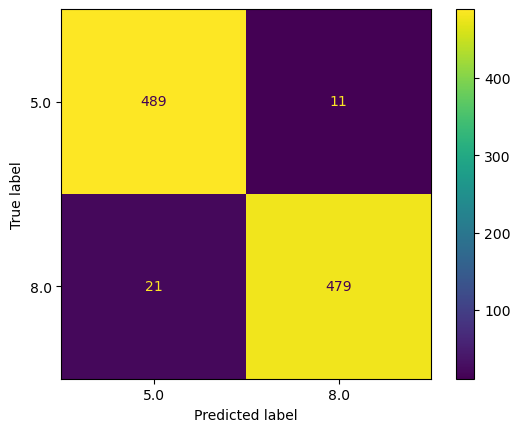

In [115]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
predictions = modelT.predict(testing[:, 0:100])
cm = confusion_matrix(testing[:,100], predictions, labels=modelT.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelT.classes_)
disp.plot()
fig = plt.gcf()
plt.show()
fig.savefig('BestModelTree_ConfusionMatrix.png')

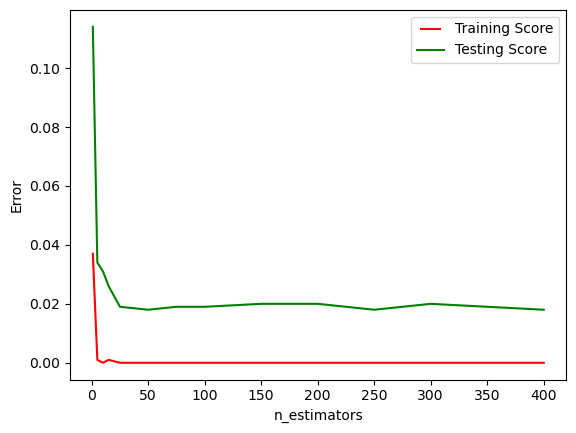

In [109]:
train_results = []
test_results = []
iterations = [1, 5, 10, 15, 25, 50, 75, 100, 150, 200, 250, 300, 400]

for iteration in iterations:
    baseModel = RandomForestClassifier(n_estimators=iteration, bootstrap=False, criterion='log_loss', max_depth=30,
                       min_samples_leaf=2, warm_start=True).fit(X,y)
    baseModel.score(validation[:,0:100], validation[:,100])

    train_results.append(1 - (baseModel.score(X,y)))
    test_results.append(1 - (baseModel.score(validation[:,0:100], validation[:,100])))

line1, = plt.plot(iterations, train_results, color="r", label="Training Score")
line2, = plt.plot(iterations, test_results, color="g", label="Testing Score")

fig = plt.gcf()
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Error')
plt.xlabel('n_estimators')
plt.show()
fig.savefig('BestModelTree_Iterations.png')